In [3]:
from analysis import scan
from analysis import tools
import numpy as np
import matplotlib.pyplot as plt
import scipy.constants as const
from scipy.optimize import curve_fit

plt.rcParams['figure.figsize'] = 16, 6

In [4]:
def gaussian(x,m,s,A):
    return A * np.exp(-(x-m)**2/(2*s**2))

def two_gauss(x,m1,m2,s1,s2,A1,A2):
    return gaussian(x,m1,s1,A1) + gaussian(x,m2,s2,A2)


def plot(scan, wl,t, ori='unk', plot=True, label=None, y_lim = None, x_lim = None):
    
    df     = scan.df.loc[(f'{wl}', f'{ori}', f'{t}sec')]
    meta   = scan.meta_df.loc[(f'{wl}', f'{ori}', f'{t}sec')]
    pw     = float(meta['pw'][0])

    sp_x   = np.array(df.loc[('sp_0')]['em_wl']);  sp_y   = np.array(df.loc[('sp_0')]['count'])
    bg_x   = np.array(df.loc[('bg_0')]['em_wl']);  bg_y   = np.array(df.loc[('bg_0')]['count'])
    
    sp_sub = np.subtract(sp_y, bg_y)
    
    # gain
    gain = int(meta['gain'].split('x')[0])

    # t_exp
    t_exp = float(t)
    
    # total number of photons calc
    E = (const.h * const.c) / (int(wl)*1e-7) # energy of one photon of wavelength: wl
    tot_E = pw * t_exp
    N_ph  = tot_E / E;
    
    norm = t_exp * gain * pw * 1e6  #*N_ph

    sp_norm  = np.divide(sp_sub,norm)
    
    # -  - - - - - - - - - - - #
    
    # set limit
    sorted_indices = np.argsort(sp_norm)[::-1]
    top_twen_values = sp_norm[sorted_indices[:10]]
    
    mean = np.mean(top_twen_values)
    lim  = mean*1.4

    
    if plot == True:
        plt.plot(sp_x, sp_norm, label = label)
        plt.grid("on")
        plt.xlabel('Emission Wavelength [nm]')
        plt.ylabel(r'photons $\cdot$ sec$^{-1}$  ${\mu W}^{-1}$')
        plt.ylim(0,lim)
        plt.legend()
    
    return sp_x, sp_norm

def calc_diff(scan1,scan2, wl, t, toplot=True, sample='unk', high='2', low='1'):
    
    col = 'darkblue'

    sp_x_1, sp_norm_1 = plot(scan1, wl, t, plot=False); sp_x_2, sp_norm_2 =  plot(scan2, wl, t, plot=False)

    diff = np.subtract(sp_norm_2, sp_norm_1)
    
    if toplot == True:
        plt.plot(sp_x_1, diff, color=col)
        plt.ylim(-1.5e-15,3.5e-14)

        plt.xlabel('Emission Wavelength [nm]')
        plt.ylabel(r'photons $\cdot$ sec$^{-1}$  ${\mu W}^{-1}$')
        plt.grid("on")
        plt.title(f'LiF {sample} coll{high} - coll{low}', fontsize = 20)

        plt.show();
    
    return sp_x_1, diff

In [5]:
# paths

path_to_study = '/home/hargy/Documents/3CS/repo_data3cs/data3cs/studies/lif_mds_1'

### dfs ###

# coll1 #

zno_500_c1 = scan.scan(f'{path_to_study}/coll1/ZnO/ZnO_B3_500.hdf5')
zno_501_c1 = scan.scan(f'{path_to_study}/coll1/ZnO/ZnO_B3_501.hdf5')
h2o_ref_c1 = scan.scan(f'{path_to_study}/coll1/H2O/H2O.hdf5')


lif_145_435_c1 = scan.scan(f'{path_to_study}/coll1/LiF/LiF_B2_145_435.hdf5')
lif_145_260_c1 = scan.scan(f'{path_to_study}/coll1/LiF/LiF_B2_145_260.hdf5')

lif_147_435_c1 = scan.scan(f'{path_to_study}/coll1/LiF/LiF_B2_147_435.hdf5')
lif_147_260_c1 = scan.scan(f'{path_to_study}/coll1/LiF/LiF_B2_147_260.hdf5')

lif_148_435_c1 = scan.scan(f'{path_to_study}/coll1/LiF/LiF_B2_148_435.hdf5')
lif_148_260_c1 = scan.scan(f'{path_to_study}/coll1/LiF/LiF_B2_148_260.hdf5')

lif_152_435_c1 = scan.scan(f'{path_to_study}/coll1/LiF/LiF_B2_152_435.hdf5')
lif_152_260_c1 = scan.scan(f'{path_to_study}/coll1/LiF/LiF_B2_152_260.hdf5')

lif_156_435_c1 = scan.scan(f'{path_to_study}/coll1/LiF/LiF_B2_156_435.hdf5')
lif_156_260_c1 = scan.scan(f'{path_to_study}/coll1/LiF/LiF_B2_156_260.hdf5')

lif_157_435_c1 = scan.scan(f'{path_to_study}/coll1/LiF/LiF_B2_157_435.hdf5')
lif_157_260_c1 = scan.scan(f'{path_to_study}/coll1/LiF/LiF_B2_157_260.hdf5')


# coll2 #


lif_145_435_c2 = scan.scan(f'{path_to_study}/coll2/LiF/LiF_B2_145_435.hdf5')
lif_145_260_c2 = scan.scan(f'{path_to_study}/coll2/LiF/LiF_B2_145_260.hdf5')

lif_147_435_c2 = scan.scan(f'{path_to_study}/coll2/LiF/LiF_B2_147_435.hdf5')
lif_147_260_c2 = scan.scan(f'{path_to_study}/coll2/LiF/LiF_B2_147_260.hdf5')

lif_148_435_c2 = scan.scan(f'{path_to_study}/coll2/LiF/LiF_B2_148_435.hdf5')
lif_148_260_c2 = scan.scan(f'{path_to_study}/coll2/LiF/LiF_B2_148_260.hdf5')

lif_152_435_c2 = scan.scan(f'{path_to_study}/coll2/LiF/LiF_B2_152_435.hdf5')
lif_152_260_c2 = scan.scan(f'{path_to_study}/coll2/LiF/LiF_B2_152_260.hdf5')

lif_156_435_c2 = scan.scan(f'{path_to_study}/coll2/LiF/LiF_B2_156_435.hdf5')
lif_156_260_c2 = scan.scan(f'{path_to_study}/coll2/LiF/LiF_B2_156_260.hdf5')

lif_157_435_c2 = scan.scan(f'{path_to_study}/coll2/LiF/LiF_B2_157_435.hdf5')
lif_157_260_c2 = scan.scan(f'{path_to_study}/coll2/LiF/LiF_B2_157_260.hdf5')


# coll3 #


lif_145_435_c3 = scan.scan(f'{path_to_study}/coll3/LiF/LiF_B2_145_435.hdf5')
lif_145_260_c3 = scan.scan(f'{path_to_study}/coll3/LiF/LiF_B2_145_260.hdf5')


lif_147_435_c3 = scan.scan(f'{path_to_study}/coll3/LiF/LiF_B2_147_435.hdf5')
lif_147_260_c3 = scan.scan(f'{path_to_study}/coll3/LiF/LiF_B2_147_260.hdf5')

lif_148_435_c3 = scan.scan(f'{path_to_study}/coll3/LiF/LiF_B2_148_435.hdf5')
lif_148_260_c3 = scan.scan(f'{path_to_study}/coll3/LiF/LiF_B2_148_260.hdf5')

lif_152_435_c3 = scan.scan(f'{path_to_study}/coll3/LiF/LiF_B2_152_435.hdf5')
lif_152_260_c3 = scan.scan(f'{path_to_study}/coll3/LiF/LiF_B2_152_260.hdf5')

lif_156_435_c3 = scan.scan(f'{path_to_study}/coll3/LiF/LiF_B2_156_435.hdf5')
lif_156_260_c3 = scan.scan(f'{path_to_study}/coll3/LiF/LiF_B2_156_260.hdf5')

lif_157_435_c3 = scan.scan(f'{path_to_study}/coll3/LiF/LiF_B2_157_435.hdf5')
lif_157_260_c3 = scan.scan(f'{path_to_study}/coll3/LiF/LiF_B2_157_260.hdf5')


# coll4 #


lif_145_435_c4= scan.scan(f'{path_to_study}/coll4/LiF/LiF_B2_145_435.hdf5')
lif_145_260_c4= scan.scan(f'{path_to_study}/coll4/LiF/LiF_B2_145_260.hdf5')


lif_147_435_c4= scan.scan(f'{path_to_study}/coll4/LiF/LiF_B2_147_435.hdf5')
lif_147_260_c4= scan.scan(f'{path_to_study}/coll4/LiF/LiF_B2_147_260.hdf5')

lif_148_435_c4= scan.scan(f'{path_to_study}/coll4/LiF/LiF_B2_148_435.hdf5')
lif_148_260_c4= scan.scan(f'{path_to_study}/coll4/LiF/LiF_B2_148_260.hdf5')

lif_152_435_c4= scan.scan(f'{path_to_study}/coll4/LiF/LiF_B2_152_435.hdf5')
lif_152_260_c4= scan.scan(f'{path_to_study}/coll4/LiF/LiF_B2_152_260.hdf5')


lif_157_435_c4= scan.scan(f'{path_to_study}/coll4/LiF/LiF_B2_157_435.hdf5')
lif_157_260_c4= scan.scan(f'{path_to_study}/coll4/LiF/LiF_B2_157_260.hdf5')


# coll5 #


lif_145_435_c5 = scan.scan(f'{path_to_study}/coll5/LiF/LiF_B2_145_435.hdf5')
lif_145_260_c5 = scan.scan(f'{path_to_study}/coll5/LiF/LiF_B2_145_260.hdf5')

lif_147_435_c5 = scan.scan(f'{path_to_study}/coll5/LiF/LiF_B2_147_435.hdf5')
lif_147_260_c5 = scan.scan(f'{path_to_study}/coll5/LiF/LiF_B2_147_260.hdf5')

lif_148_435_c5 = scan.scan(f'{path_to_study}/coll5/LiF/LiF_B2_148_435.hdf5')
lif_148_260_c5 = scan.scan(f'{path_to_study}/coll5/LiF/LiF_B2_148_260.hdf5')

lif_152_435_c5 = scan.scan(f'{path_to_study}/coll5/LiF/LiF_B2_152_435.hdf5')
lif_152_260_c5 = scan.scan(f'{path_to_study}/coll5/LiF/LiF_B2_152_260.hdf5')

lif_157_435_c5 = scan.scan(f'{path_to_study}/coll5/LiF/LiF_B2_157_435.hdf5')
lif_157_260_c5 = scan.scan(f'{path_to_study}/coll5/LiF/LiF_B2_157_260.hdf5')

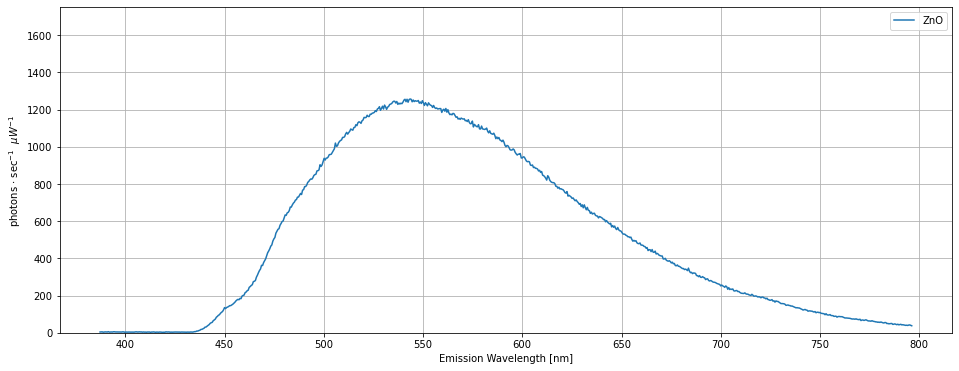

In [7]:
plot(zno_501_c1, '400', '1.0', label = 'ZnO');

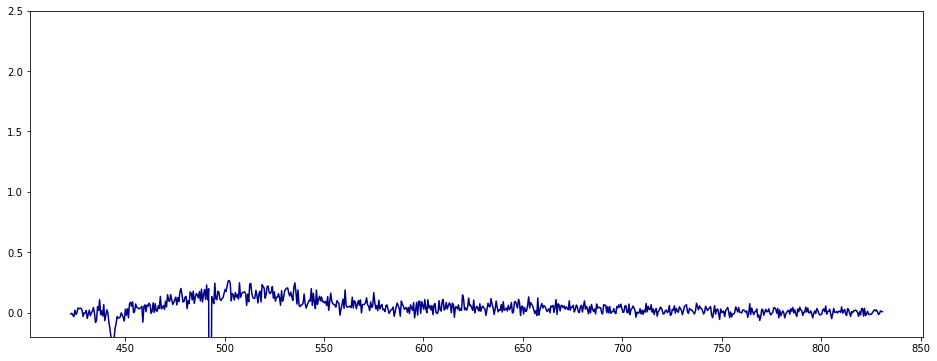

In [8]:
tools.get_diff(lif_152_435_c2, lif_152_435_c5, '435', '30.0', 'unk');

#  --------------------------- 435 nm --------------  ---------------

# LiF_B2_145

In [ ]:
wl = '435'; t = '60.0'
col = 'darkblue'
num = '145'

sp_x_1, sp_norm_1 = plot(lif_145_435_c2, wl, t, plot=False); sp_x_2, sp_norm_2 =  plot(lif_145_435_c3, wl, t, plot=False)

plt.plot(sp_x_1, muon_removal(diff, 0.2)[0], color=col)
plt.ylim(-0.2,1)


plt.xlabel('Emission Wavelength [nm]')
plt.ylabel(r'photons $\cdot$ sec$^{-1}$  ${\mu W}^{-1}$')
plt.grid("on")
plt.title(f'LiF {num} coll3 - coll2', fontsize = 20)

plt.show();

sp_x_1, sp_norm_1 = plot(lif_145_435_c2, wl, t, plot=False); sp_x_2, sp_norm_2 =  plot(lif_145_435_c4, wl, t, plot=False)

diff = np.subtract(sp_norm_2, sp_norm_1)
plt.plot(sp_x_1, muon_removal(diff, 0.2)[0], color=col)
plt.ylim(-0.2,1)


plt.xlabel('Emission Wavelength [nm]')
plt.ylabel(r'photons $\cdot$ sec$^{-1}$  ${\mu W}^{-1}$')
plt.grid("on")
plt.title(f'LiF {num} coll4 - coll2', fontsize = 20)

plt.show();

wl = '435'; t = '30.0'
col = 'darkblue'

sp_x_1, sp_norm_1 = plot(lif_145_435_c2, wl, t, plot=False); sp_x_2, sp_norm_2 =  plot(lif_145_435_c5, wl, t, plot=False)

diff = np.subtract(sp_norm_2, sp_norm_1)
plt.plot(sp_x_1, muon_removal(diff, 0.2)[0], color=col)
plt.ylim(-0.2,1)


plt.xlabel('Emission Wavelength [nm]')
plt.ylabel(r'photons $\cdot$ sec$^{-1}$  ${\mu W}^{-1}$')
plt.grid("on")
plt.title(f'LiF {num} coll5 - coll2', fontsize = 20)

plt.show();

NameError: name 'muon_removal' is not defined

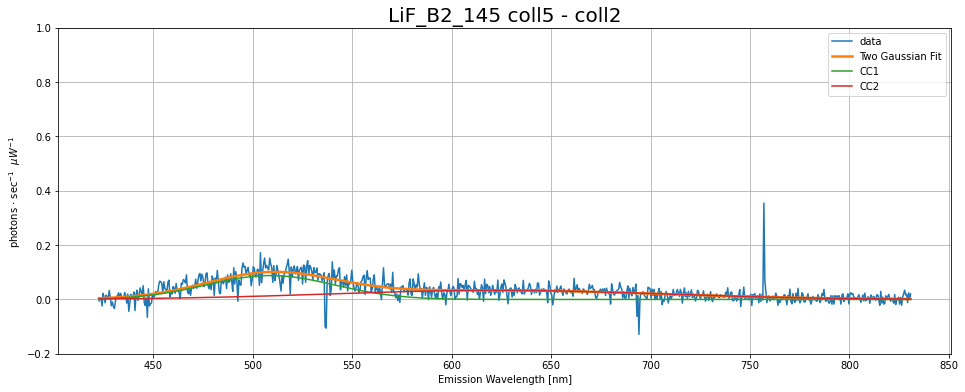

mean1: 2.397712908539436
mean2: 336.39577340651545
std1: 6.818452295057457
std2: 206.141486698849
A1: 6.390074385908252e-05
A2: 5.122152910621263e-06


In [377]:
tot_areas = []
cc1_areas = []
cc2_areas = []

num = 145

###

x1, y1 = calc_diff(lif_145_435_c2, lif_145_435_c5, '435', '60.0', toplot = False)
popt, pcov = curve_fit(two_gauss,x1, y1, p0=[530,680,20,80,0.1,0.1])

y_opt = []
y_530 = []
y_680 = []
for x in x1:
    y_opt.append(two_gauss(x, *popt))
    y_530.append(gaussian(x, popt[0],popt[2], popt[4]))
    y_680.append(gaussian(x, popt[1], popt[3], popt[5]))

plt.plot(x1,y1, linewidth = 1.5, label='data')
plt.plot(x1, y_opt, linewidth = 2.5, label = 'Two Gaussian Fit')
plt.plot(x1, y_530, label = 'CC1')
plt.plot(x1, y_680, label ='CC2')
plt.grid("on")
plt.legend()
plt.title(f"LiF_B2_{num} coll5 - coll2", fontsize=20)
plt.xlabel('Emission Wavelength [nm]')
plt.ylabel(r'photons $\cdot$ sec$^{-1}$  ${\mu W}^{-1}$')
plt.ylim(-0.2,1)
plt.show()

tot_area = np.trapz(y_opt, x1)
cc1_area = np.trapz(y_530, x1)
cc2_area = np.trapz(y_680, x1)

tot_areas.append(tot_area)
cc1_areas.append(cc1_area)
cc2_areas.append(cc2_area)

lif_145_tot = tot_areas
lif_145_cc1 = cc1_areas
lif_145_cc2 = cc2_areas

print('mean1: ' + str(pcov[0][0]))
print('mean2: ' + str(pcov[1][1]))
print('std1: ' + str(pcov[2][2]))
print('std2: ' + str(pcov[3][3]))
print('A1: ' + str(pcov[4][4]))
print('A2: ' + str(pcov[5][5]))

# LiF_B2_147

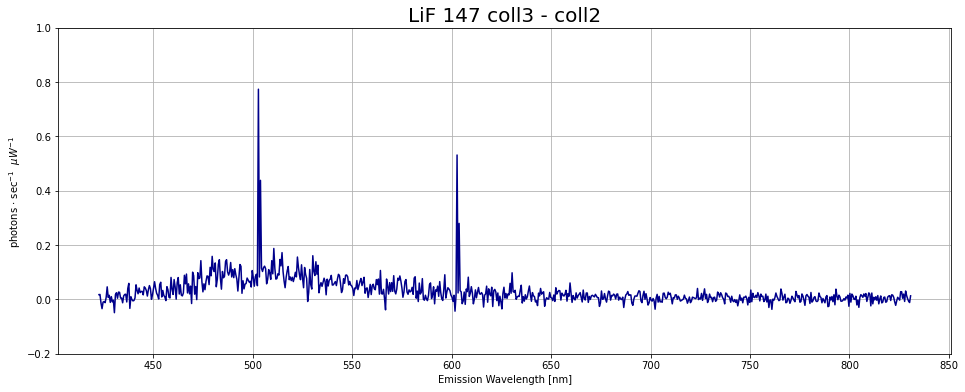

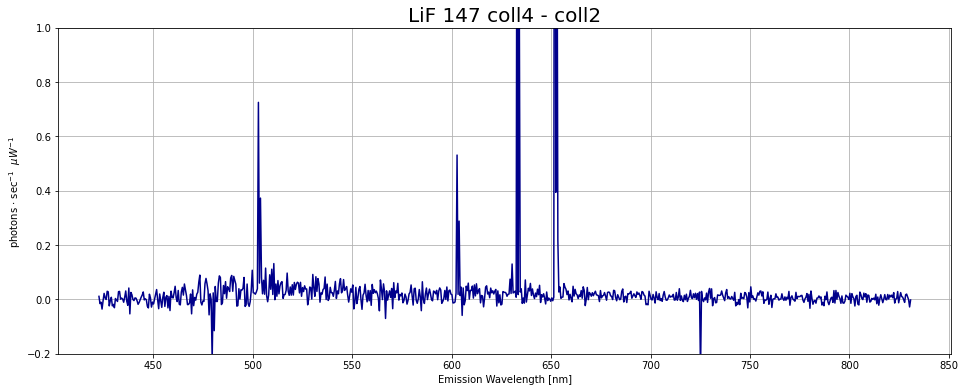

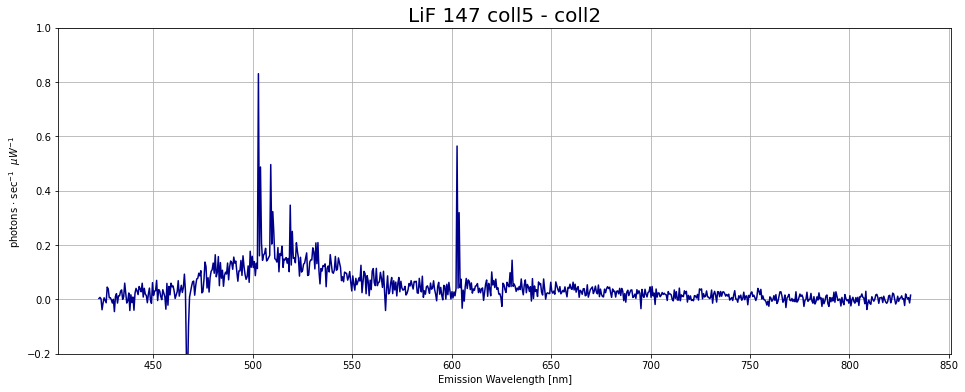

In [406]:
wl = '435'; t = '60.0'
col = 'darkblue'
num = '147'

sp_x_1, sp_norm_1 = plot(lif_147_435_c2, wl, t, plot=False); sp_x_2, sp_norm_2 =  plot(lif_147_435_c3, wl, t, plot=False)

diff = np.subtract(sp_norm_2, sp_norm_1)
plt.plot(sp_x_1, muon_removal(diff, 0.3)[0], color=col)
plt.ylim(-0.2,1)


plt.xlabel('Emission Wavelength [nm]')
plt.ylabel(r'photons $\cdot$ sec$^{-1}$  ${\mu W}^{-1}$')
plt.grid("on")
plt.title(f'LiF {num} coll3 - coll2', fontsize = 20)

plt.show();


sp_x_1, sp_norm_1 = plot(lif_147_435_c2, wl, t, plot=False); sp_x_2, sp_norm_2 =  plot(lif_147_435_c4, wl, t, plot=False)

diff = np.subtract(sp_norm_2, sp_norm_1)
plt.plot(sp_x_1, muon_removal(diff, 0.3)[0], color=col)
plt.ylim(-0.2,1)


plt.xlabel('Emission Wavelength [nm]')
plt.ylabel(r'photons $\cdot$ sec$^{-1}$  ${\mu W}^{-1}$')
plt.grid("on")
plt.title(f'LiF {num} coll4 - coll2', fontsize = 20)

plt.show();

sp_x_1, sp_norm_1 = plot(lif_147_435_c2, wl, t, plot=False); sp_x_2, sp_norm_2 =  plot(lif_147_435_c5, wl, t, plot=False)

diff = np.subtract(sp_norm_2, sp_norm_1)
plt.plot(sp_x_1, muon_removal(diff, 0.3)[0], color=col)
plt.ylim(-0.2,1)


plt.xlabel('Emission Wavelength [nm]')
plt.ylabel(r'photons $\cdot$ sec$^{-1}$  ${\mu W}^{-1}$')
plt.grid("on")
plt.title(f'LiF {num} coll5 - coll2', fontsize = 20)

plt.show();

/usr/lib/python3/dist-packages/scipy/optimize/_minpack_py.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


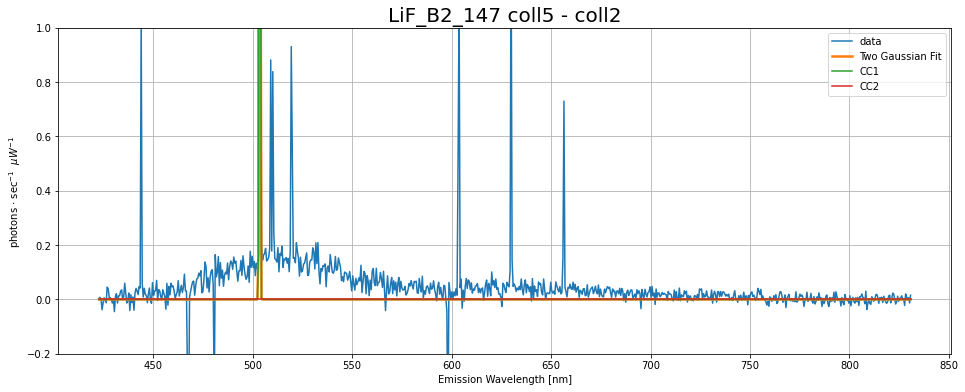

[4.2396598935074605]


In [141]:
tot_areas = []
cc1_areas = []
cc2_areas = []

num = 147

###

x1, y1 = calc_diff(lif_147_435_c2, lif_147_435_c5, '435', '60.0', toplot = False)
popt, pcov = curve_fit(two_gauss,x1, y1, p0=[530,680,20,80,0.1,1e-15])

y_opt = []
y_530 = []
y_680 = []
for x in x1:
    y_opt.append(two_gauss(x, *popt))
    y_530.append(gaussian(x, popt[0],popt[2], popt[4]))
    y_680.append(gaussian(x, popt[1], popt[3], popt[5]))

plt.plot(x1,y1, linewidth = 1.5, label='data')
plt.plot(x1, y_opt, linewidth = 2.5, label = 'Two Gaussian Fit')
plt.plot(x1, y_530, label = 'CC1')
plt.plot(x1, y_680, label ='CC2')
plt.grid("on")
plt.legend()
plt.title(f"LiF_B2_{num} coll5 - coll2", fontsize=20)
plt.xlabel('Emission Wavelength [nm]')
plt.ylabel(r'photons $\cdot$ sec$^{-1}$  ${\mu W}^{-1}$')
plt.ylim(-0.2,1)
plt.show()

tot_area = np.trapz(y_opt, x1)
cc1_area = np.trapz(y_530, x1)
cc2_area = np.trapz(y_680, x1)

tot_areas.append(tot_area)
cc1_areas.append(cc1_area)
cc2_areas.append(cc2_area)

lif_147_tot = tot_areas
lif_147_cc1 = cc1_areas
lif_147_cc2 = cc2_areas

print(lif_147_tot)

# LiF_B2_148

In [2]:
wl = '260'; t = '75.0'
col = 'darkblue'
num = '148'

sp_x_1, sp_norm_1 = plot(lif_148_435_c2, wl, t, plot=False); sp_x_2, sp_norm_2 =  plot(lif_148_435_c3, wl, t, plot=False)

diff = np.subtract(sp_norm_2, sp_norm_1)
plt.plot(sp_x_1, muon_removal(diff, 0.2)[0], color=col)
plt.ylim(-0.2,1)

plt.xlabel('Emission Wavelength [nm]')
plt.ylabel(r'photons $\cdot$ sec$^{-1}$  ${\mu W}^{-1}$')
plt.grid("on")
plt.title(f'LiF {num} coll3 - coll2', fontsize = 20)

plt.show();

sp_x_1, sp_norm_1 = plot(lif_148_435_c2, wl, t, plot=False); sp_x_2, sp_norm_2 =  plot(lif_148_435_c4, wl, t, plot=False)

diff = np.subtract(sp_norm_2, sp_norm_1)
plt.plot(sp_x_1, muon_removal(diff, 0.2)[0], color=col)
plt.ylim(-0.2,1)


plt.xlabel('Emission Wavelength [nm]')
plt.ylabel(r'photons $\cdot$ sec$^{-1}$  ${\mu W}^{-1}$')
plt.grid("on")
plt.title(f'LiF {num} coll4 - coll2', fontsize = 20)

plt.show();

sp_x_1, sp_norm_1 = plot(lif_148_435_c2, wl, t, plot=False); sp_x_2, sp_norm_2 =  plot(lif_148_435_c5, wl, t, plot=False)

diff = np.subtract(sp_norm_2, sp_norm_1)
plt.plot(sp_x_1, muon_removal(diff, 0.2)[0], color=col)
plt.ylim(-0.2,1)


plt.xlabel('Emission Wavelength [nm]')
plt.ylabel(r'photons $\cdot$ sec$^{-1}$  ${\mu W}^{-1}$')
plt.grid("on")
plt.title(f'LiF {num} coll4 - coll2', fontsize = 20)

plt.show();

NameError: name 'plot' is not defined

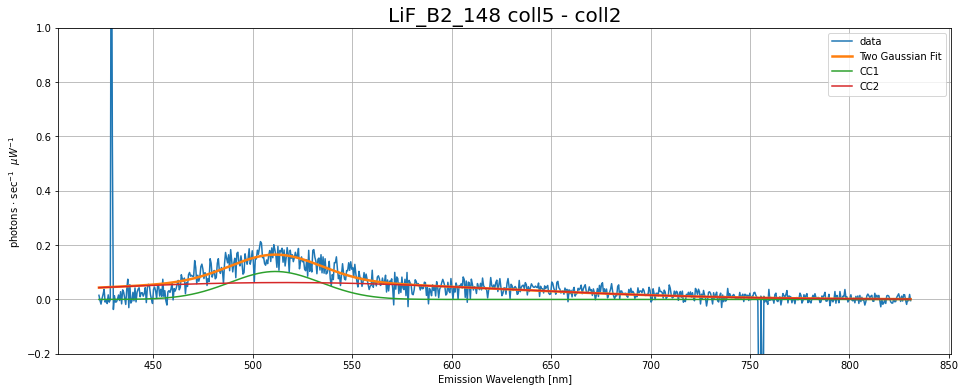

[19.649157741524313]


In [143]:
tot_areas = []
cc1_areas = []
cc2_areas = []

num = 148

###

x1, y1 = calc_diff(lif_148_435_c2, lif_148_435_c5, '435', '60.0', toplot = False)
popt, pcov = curve_fit(two_gauss,x1, y1, p0=[530,680,20,80,1,1])

y_opt = []
y_530 = []
y_680 = []
for x in x1:
    y_opt.append(two_gauss(x, *popt))
    y_530.append(gaussian(x, popt[0],popt[2], popt[4]))
    y_680.append(gaussian(x, popt[1], popt[3], popt[5]))

plt.plot(x1,y1, linewidth = 1.5, label='data')
plt.plot(x1, y_opt, linewidth = 2.5, label = 'Two Gaussian Fit')
plt.plot(x1, y_530, label = 'CC1')
plt.plot(x1, y_680, label ='CC2')
plt.grid("on")
plt.legend()
plt.title(f"LiF_B2_{num} coll5 - coll2", fontsize=20)
plt.xlabel('Emission Wavelength [nm]')
plt.ylabel(r'photons $\cdot$ sec$^{-1}$  ${\mu W}^{-1}$')
plt.ylim(-0.2,1)
plt.show()

tot_area = np.trapz(y_opt, x1)
cc1_area = np.trapz(y_530, x1)
cc2_area = np.trapz(y_680, x1)

tot_areas.append(tot_area)
cc1_areas.append(cc1_area)
cc2_areas.append(cc2_area)

lif_148_tot = tot_areas
lif_148_cc1 = cc1_areas
lif_148_cc2 = cc2_areas

print(lif_148_tot)

# LiF_B2_152

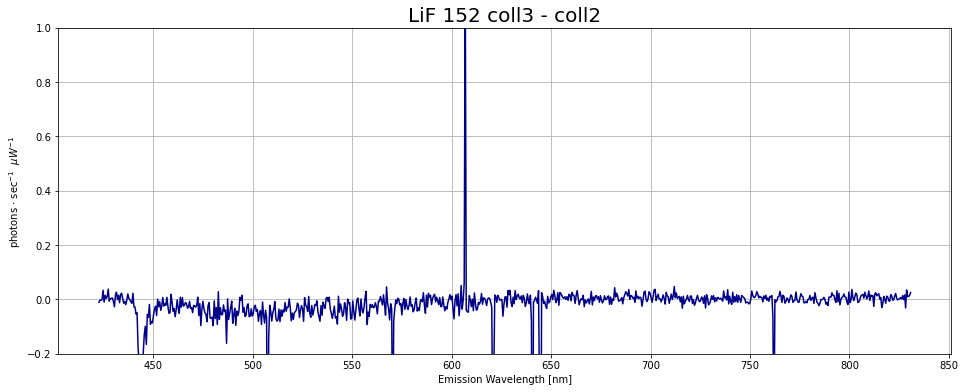

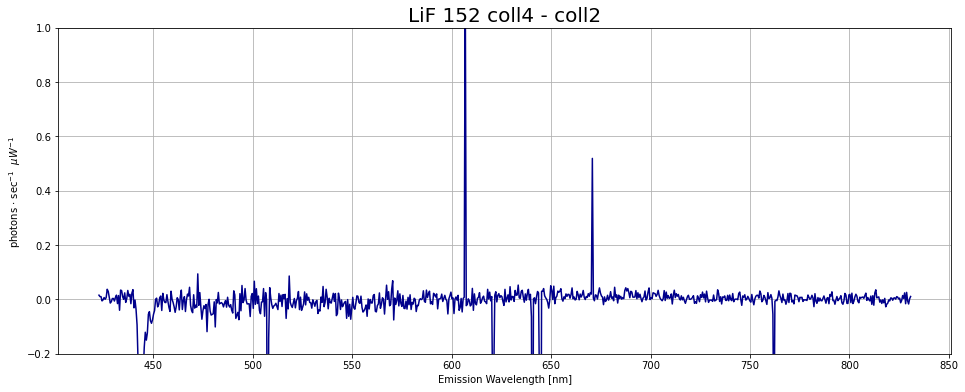

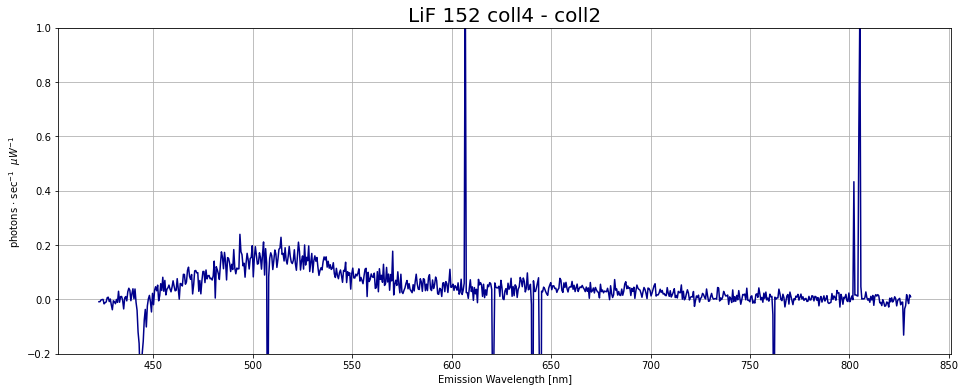

In [144]:
wl = '435'; t = '60.0'
col = 'darkblue'
num = '152'

sp_x_1, sp_norm_1 = plot(lif_152_435_c2, wl, t, plot=False); sp_x_2, sp_norm_2 =  plot(lif_152_435_c3, wl, t, plot=False)

diff = np.subtract(sp_norm_2, sp_norm_1)
plt.plot(sp_x_1, diff, color=col)
plt.ylim(-0.2,1)


plt.xlabel('Emission Wavelength [nm]')
plt.ylabel(r'photons $\cdot$ sec$^{-1}$  ${\mu W}^{-1}$')
plt.grid("on")
plt.title(f'LiF {num} coll3 - coll2', fontsize = 20)

plt.show();


sp_x_1, sp_norm_1 = plot(lif_152_435_c2, wl, t, plot=False); sp_x_2, sp_norm_2 =  plot(lif_152_435_c4, wl, t, plot=False)

diff = np.subtract(sp_norm_2, sp_norm_1)
plt.plot(sp_x_1, diff, color=col)
plt.ylim(-0.2,1)


plt.xlabel('Emission Wavelength [nm]')
plt.ylabel(r'photons $\cdot$ sec$^{-1}$  ${\mu W}^{-1}$')
plt.grid("on")
plt.title(f'LiF {num} coll4 - coll2', fontsize = 20)

plt.show();

sp_x_1, sp_norm_1 = plot(lif_152_435_c2, wl, t, plot=False); sp_x_2, sp_norm_2 =  plot(lif_152_435_c5, wl, t, plot=False)

diff = np.subtract(sp_norm_2, sp_norm_1)
plt.plot(sp_x_1, diff, color=col)
plt.ylim(-0.2,1)


plt.xlabel('Emission Wavelength [nm]')
plt.ylabel(r'photons $\cdot$ sec$^{-1}$  ${\mu W}^{-1}$')
plt.grid("on")
plt.title(f'LiF {num} coll4 - coll2', fontsize = 20)

plt.show();

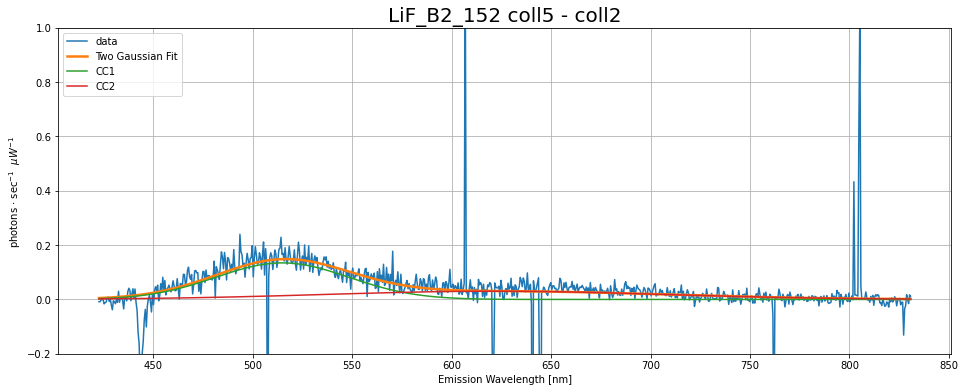

[17.625096434504485]


In [145]:
tot_areas = []
cc1_areas = []
cc2_areas = []

num = 152

###

x1, y1 = calc_diff(lif_152_435_c2, lif_152_435_c5, '435', '60.0', toplot = False)
popt, pcov = curve_fit(two_gauss,x1, y1, p0=[530,680,20,80,1,1])

y_opt = []
y_530 = []
y_680 = []
for x in x1:
    y_opt.append(two_gauss(x, *popt))
    y_530.append(gaussian(x, popt[0],popt[2], popt[4]))
    y_680.append(gaussian(x, popt[1], popt[3], popt[5]))

plt.plot(x1,y1, linewidth = 1.5, label='data')
plt.plot(x1, y_opt, linewidth = 2.5, label = 'Two Gaussian Fit')
plt.plot(x1, y_530, label = 'CC1')
plt.plot(x1, y_680, label ='CC2')
plt.grid("on")
plt.legend()
plt.title(f"LiF_B2_{num} coll5 - coll2", fontsize=20)
plt.xlabel('Emission Wavelength [nm]')
plt.ylabel(r'photons $\cdot$ sec$^{-1}$  ${\mu W}^{-1}$')
plt.ylim(-0.2,1)
plt.show()

tot_area = np.trapz(y_opt, x1)
cc1_area = np.trapz(y_530, x1)
cc2_area = np.trapz(y_680, x1)

tot_areas.append(tot_area)
cc1_areas.append(cc1_area)
cc2_areas.append(cc2_area)

lif_152_tot = tot_areas
lif_152_cc1 = cc1_areas
lif_152_cc2 = cc2_areas

print(lif_152_tot)

# LiF_B2_157

In [10]:
wl = '260'; t = '60.0'
col = 'darkblue'
num = '157'

sp_x_1, sp_norm_1 = plot(lif_157_435_c2, wl, t, plot=False); sp_x_2, sp_norm_2 =  plot(lif_157_435_c3, wl, t, plot=False)

diff = np.subtract(sp_norm_2, sp_norm_1)
plt.plot(sp_x_1, diff, color=col)
plt.ylim(-0.2,1)

plt.xlabel('Emission Wavelength [nm]')
plt.ylabel(r'photons $\cdot$ sec$^{-1}$  ${\mu W}^{-1}$')
plt.grid("on")
plt.title(f'LiF {num} coll3 - coll2', fontsize = 20)

plt.show();


sp_x_1, sp_norm_1 = plot(lif_157_435_c2, wl, t, plot=False); sp_x_2, sp_norm_2 =  plot(lif_157_435_c4, wl, t, plot=False)

diff = np.subtract(sp_norm_2, sp_norm_1)
plt.plot(sp_x_1, diff, color=col)
plt.ylim(-0.2,1)


plt.xlabel('Emission Wavelength [nm]')
plt.ylabel(r'photons $\cdot$ sec$^{-1}$  ${\mu W}^{-1}$')
plt.grid("on")
plt.title(f'LiF {num} coll4 - coll2', fontsize = 20)

plt.show();

sp_x_1, sp_norm_1 = plot(lif_157_435_c2, wl, t, plot=False); sp_x_2, sp_norm_2 =  plot(lif_157_435_c5, wl, t, plot=False)

diff = np.subtract(sp_norm_2, sp_norm_1)
plt.plot(sp_x_1, diff, color=col)
plt.ylim(-0.2,1)


plt.xlabel('Emission Wavelength [nm]')
plt.ylabel(r'photons $\cdot$ sec$^{-1}$  ${\mu W}^{-1}$')
plt.grid("on")
plt.title(f'LiF {num} coll5 - coll2', fontsize = 20)

plt.show();

KeyError: ('260', 'unk', '60.0sec')

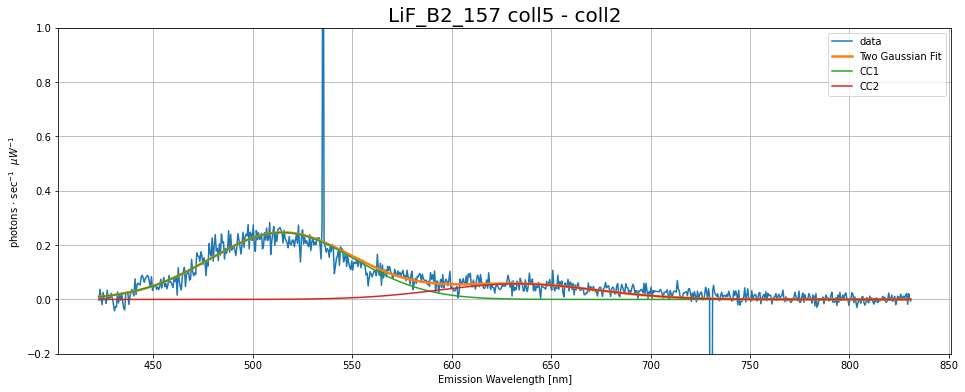

[27.92321404912701]
mean1: 10.265931264387772
mean2: 204.63111741594793
std1: 10.390593105763545
std2: 213.14485321099014
A1: 0.00017366607630589541
A2: 0.00015957241199150723


In [147]:
tot_areas = []
cc1_areas = []
cc2_areas = []

num = 157

###

x1, y1 = calc_diff(lif_157_435_c2, lif_157_435_c5, '435', '60.0', toplot = False)
popt, pcov = curve_fit(two_gauss,x1, y1, p0=[530,680,20,80,1,1])

y_opt = []
y_530 = []
y_680 = []
for x in x1:
    y_opt.append(two_gauss(x, *popt))
    y_530.append(gaussian(x, popt[0],popt[2], popt[4]))
    y_680.append(gaussian(x, popt[1], popt[3], popt[5]))

plt.plot(x1,y1, linewidth = 1.5, label='data')
plt.plot(x1, y_opt, linewidth = 2.5, label = 'Two Gaussian Fit')
plt.plot(x1, y_530, label = 'CC1')
plt.plot(x1, y_680, label ='CC2')
plt.grid("on")
plt.legend()
plt.title(f"LiF_B2_{num} coll5 - coll2", fontsize=20)
plt.xlabel('Emission Wavelength [nm]')
plt.ylabel(r'photons $\cdot$ sec$^{-1}$  ${\mu W}^{-1}$')
plt.ylim(-0.2,1)
plt.show()

tot_area = np.trapz(y_opt, x1)
cc1_area = np.trapz(y_530, x1)
cc2_area = np.trapz(y_680, x1)

tot_areas.append(tot_area)
cc1_areas.append(cc1_area)
cc2_areas.append(cc2_area)

lif_157_tot = tot_areas
lif_157_cc1 = cc1_areas
lif_157_cc2 = cc2_areas

print(lif_157_tot)

print('mean1: ' + str(pcov[0][0]))
print('mean2: ' + str(pcov[1][1]))
print('std1: ' + str(pcov[2][2]))
print('std2: ' + str(pcov[3][3]))
print('A1: ' + str(pcov[4][4]))
print('A2: ' + str(pcov[5][5]))

#  --------------------------- 260 nm --------------------------------

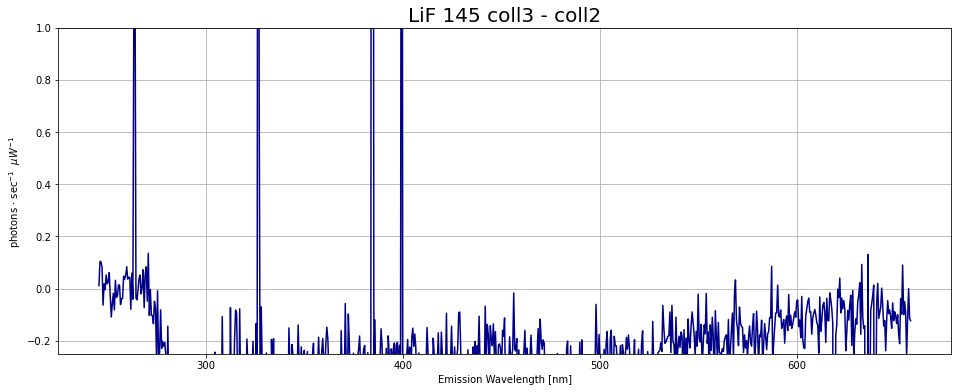

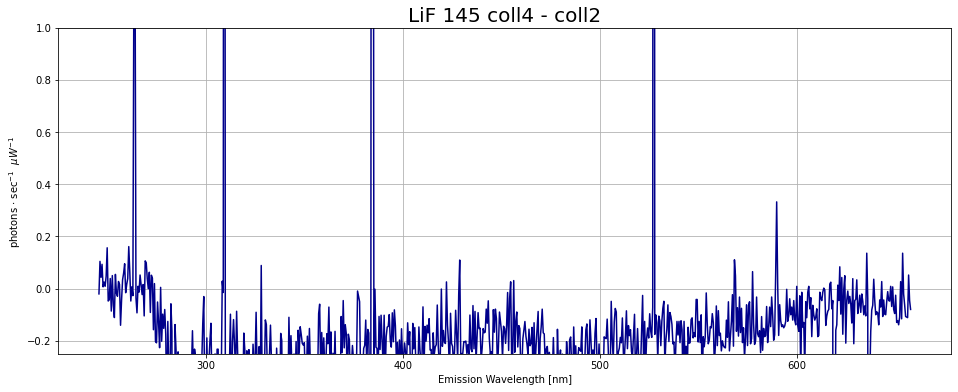

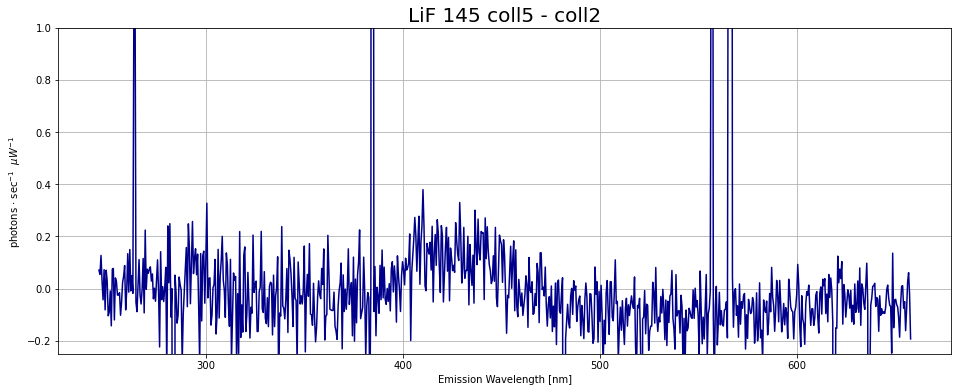

In [137]:
wl = '260'; t = '75.0'
col = 'darkblue'
num = '145'

sp_x_1, sp_norm_1 = plot(lif_145_260_c2, wl, t, plot=False); sp_x_2, sp_norm_2 =  plot(lif_145_260_c3, wl, t, plot=False)

diff = np.subtract(sp_norm_2, sp_norm_1)
plt.plot(sp_x_1, diff, color=col)
plt.ylim(-0.25,1)


plt.xlabel('Emission Wavelength [nm]')
plt.ylabel(r'photons $\cdot$ sec$^{-1}$  ${\mu W}^{-1}$')
plt.grid("on")
plt.title(f'LiF {num} coll3 - coll2', fontsize = 20)

plt.show();


sp_x_1, sp_norm_1 = plot(lif_145_260_c2, wl, t, plot=False); sp_x_2, sp_norm_2 =  plot(lif_145_260_c4, wl, t, plot=False)

diff = np.subtract(sp_norm_2, sp_norm_1)
plt.plot(sp_x_1, diff, color=col)
plt.ylim(-0.25,1)



plt.xlabel('Emission Wavelength [nm]')
plt.ylabel(r'photons $\cdot$ sec$^{-1}$  ${\mu W}^{-1}$')
plt.grid("on")
plt.title(f'LiF {num} coll4 - coll2', fontsize = 20)

plt.show();


sp_x_1, sp_norm_1 = plot(lif_145_260_c2, wl, t, plot=False); sp_x_2, sp_norm_2 =  plot(lif_145_260_c5, wl, t, plot=False)

diff = np.subtract(sp_norm_2, sp_norm_1)
plt.plot(sp_x_1, diff, color=col)
plt.ylim(-0.25,1)



plt.xlabel('Emission Wavelength [nm]')
plt.ylabel(r'photons $\cdot$ sec$^{-1}$  ${\mu W}^{-1}$')
plt.grid("on")
plt.title(f'LiF {num} coll5 - coll2', fontsize = 20)

plt.show();

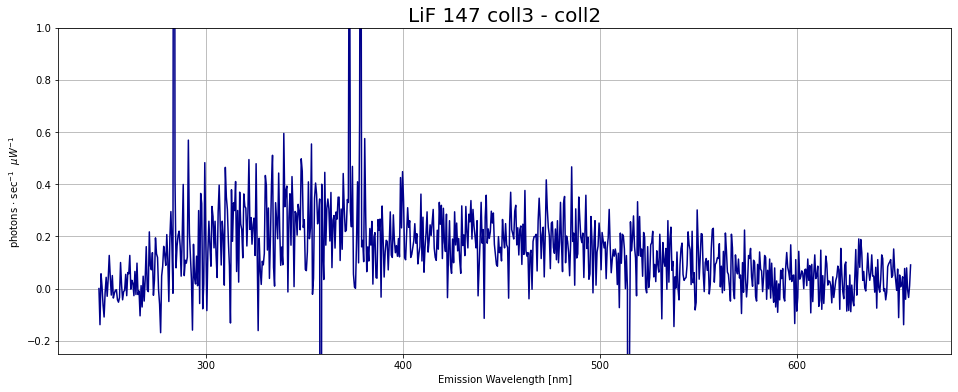

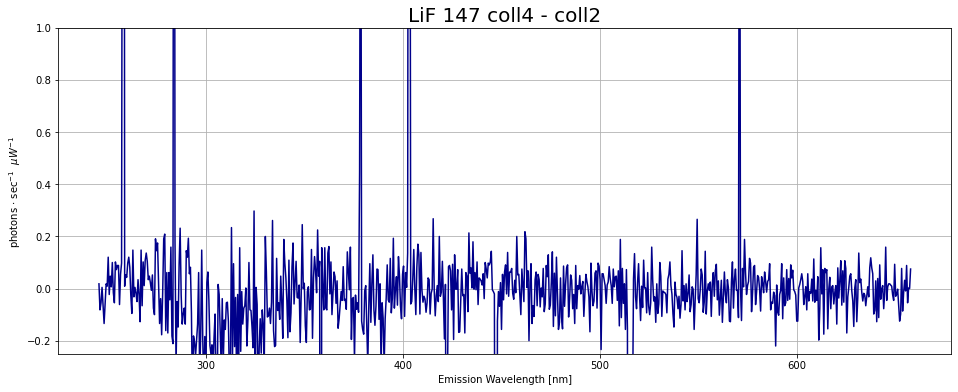

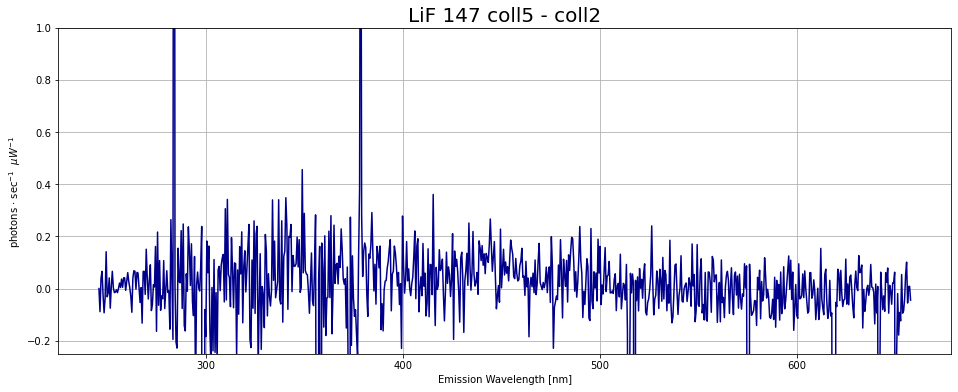

In [11]:
wl = '260'; t = '75.0'
col = 'darkblue'
num = '147'

sp_x_1, sp_norm_1 = plot(lif_147_260_c2, wl, t, plot=False); sp_x_2, sp_norm_2 =  plot(lif_147_260_c3, wl, t, plot=False)

diff = np.subtract(sp_norm_2, sp_norm_1)
plt.plot(sp_x_1, diff, color=col)
plt.ylim(-0.25,1)



plt.xlabel('Emission Wavelength [nm]')
plt.ylabel(r'photons $\cdot$ sec$^{-1}$  ${\mu W}^{-1}$')
plt.grid("on")
plt.title(f'LiF {num} coll3 - coll2', fontsize = 20)

plt.show();


sp_x_1, sp_norm_1 = plot(lif_147_260_c2, wl, t, plot=False); sp_x_2, sp_norm_2 =  plot(lif_147_260_c4, wl, t, plot=False)

diff = np.subtract(sp_norm_2, sp_norm_1)
plt.plot(sp_x_1, diff, color=col)
plt.ylim(-0.25,1)


plt.xlabel('Emission Wavelength [nm]')
plt.ylabel(r'photons $\cdot$ sec$^{-1}$  ${\mu W}^{-1}$')
plt.grid("on")
plt.title(f'LiF {num} coll4 - coll2', fontsize = 20)

plt.show();


sp_x_1, sp_norm_1 = plot(lif_147_260_c2, wl, t, plot=False); sp_x_2, sp_norm_2 =  plot(lif_147_260_c5, wl, t, plot=False)

diff = np.subtract(sp_norm_2, sp_norm_1)
plt.plot(sp_x_1, diff, color=col)
plt.ylim(-0.25,1)


plt.xlabel('Emission Wavelength [nm]')
plt.ylabel(r'photons $\cdot$ sec$^{-1}$  ${\mu W}^{-1}$')
plt.grid("on")
plt.title(f'LiF {num} coll5 - coll2', fontsize = 20)

plt.show();

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


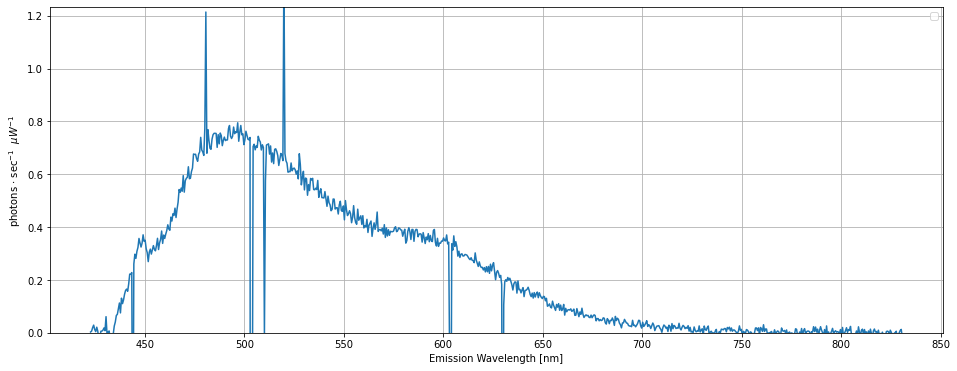

In [16]:
wl = '435'; t='60.0'
plot(lif_147_435_c2, wl, t, plot=True);

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


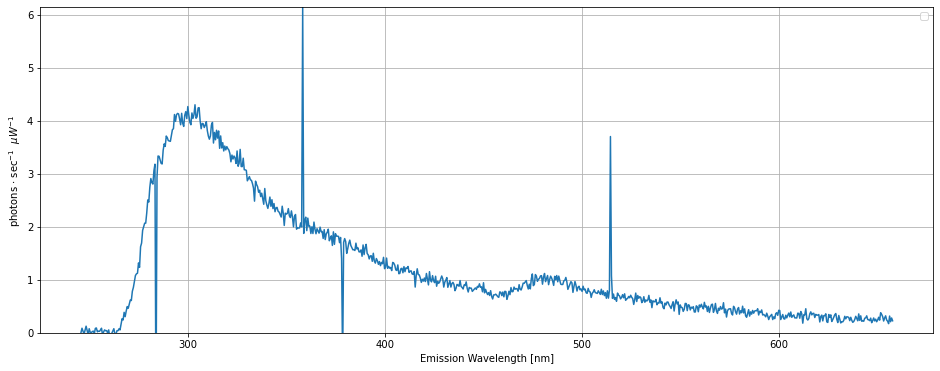

In [18]:
wl = '260'; t='75.0'
plot(lif_147_260_c2, wl, t, plot=True);